In [ ]:
#import the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Q1_material_diabetic_data_final.csv'  # Update this path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


<ipython-input-2-07cea0ea6303>:4: DtypeWarning: Columns (6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Columns with missing values:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Dropped columns: []
Remaining columns after dropping: 46

Missing values after cleaning:
0
Number of duplicate rows: 0


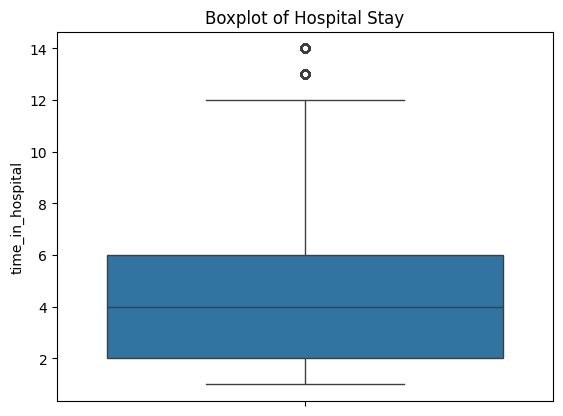

The 'age' column is already numeric.


In [ ]:
#Step 2.1: Understanding Missing Values
# Check missing values
# Step 2.1: Understanding Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Combine into a dataframe
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

# Display only columns with missing values
print("Columns with missing values:")
print(missing_df[missing_df['Missing Values'] > 0])

# Step 2.2: Drop columns with >50% missing values
drop_cols = missing_df[missing_df['Percentage'] > 50].index
df.drop(columns=drop_cols, inplace=True)
print(f"\nDropped columns: {list(drop_cols)}")
print(f"Remaining columns after dropping: {df.shape[1]}")

# Step 2.3: Impute missing values in remaining columns
impute_cols = missing_df[(missing_df['Percentage'] > 0) & (missing_df['Percentage'] <= 50)].index

# Separate numerical and categorical columns
num_cols = df[impute_cols].select_dtypes(include=['int64', 'float64']).columns
cat_cols = df[impute_cols].select_dtypes(include=['object']).columns

# Impute numerical columns with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2.4: Verify if missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())  # Should be 0 if all missing values are handled
#Drops columns where >50% values are missing.
#Imputes numerical columns using median.
#Imputes categorical columns using mode.
####handling duplicates
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Drop duplicates
df.drop_duplicates(inplace=True)
#handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to detect outliers in time_in_hospital
sns.boxplot(df["time_in_hospital"])
plt.title("Boxplot of Hospital Stay")
plt.show()
#handling data type issue
#handling data type issue
# Convert age to integer if it's not already numeric
if df['age'].dtype == 'object':  # Check if 'age' column is of type object (string)
    df['age'] = df['age'].str.extract('(\d+)').astype(float)
else:
    print("The 'age' column is already numeric.") # Inform the user that no conversion is needed







In [ ]:
#Checkin g before EDA
df.info()
df.describe()
df.head()
# Save cleaned dataset to a CSV file
df.to_csv('cleaned_diabetes_data.csv', index=False)

# Download the file in Google Colab
from google.colab import files
files.download('cleaned_diabetes_data.csv')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                101766 non-null  int64  
 1   encounter_id              101766 non-null  int64  
 2   patient_nbr               101766 non-null  int64  
 3   race                      101766 non-null  object 
 4   gender                    101766 non-null  object 
 5   age                       101766 non-null  float64
 6   weight                    101766 non-null  object 
 7   admission_type_id         101766 non-null  int64  
 8   discharge_disposition_id  101766 non-null  int64  
 9   admission_source_id       101766 non-null  int64  
 10  time_in_hospital          101766 non-null  int64  
 11  payer_code                101766 non-null  object 
 12  medical_specialty         101766 non-null  object 
 13  num_lab_procedures        101766 non-null  i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-12-5e9743f5529c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['readmitted'], palette='coolwarm')


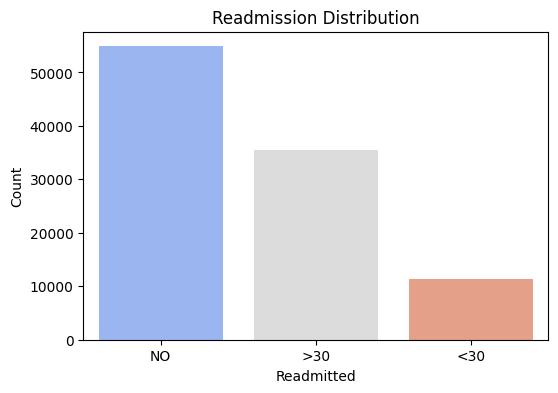

Readmission Rate:
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


In [ ]:
#EDA
# Countplot of readmission
plt.figure(figsize=(6,4))
sns.countplot(x=df['readmitted'], palette='coolwarm')
plt.title("Readmission Distribution")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()

# Calculate readmission rate
readmission_rate = df['readmitted'].value_counts(normalize=True) * 100
print(f"Readmission Rate:\n{readmission_rate}")


<ipython-input-14-f6d2fdfc1423>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted'], y=df['age'], palette="coolwarm")


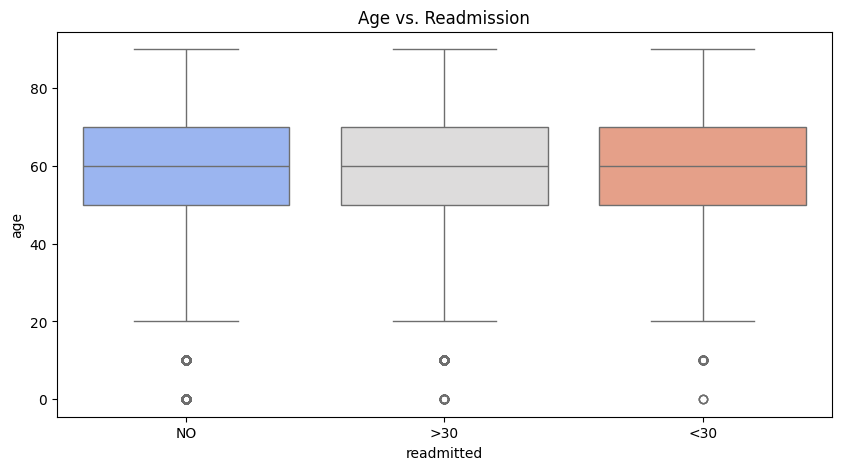

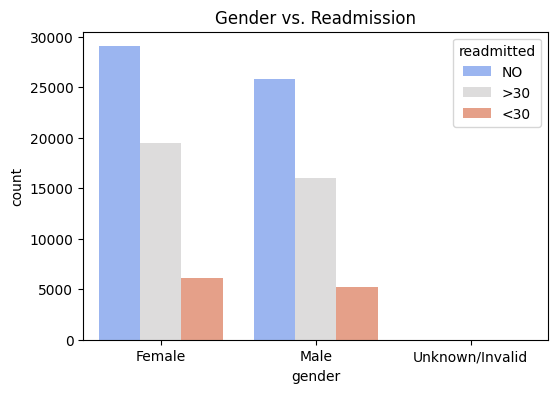

In [ ]:
#Demographic Factors & Readmission
# Age & Readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['readmitted'], y=df['age'], palette="coolwarm")
plt.title("Age vs. Readmission")
plt.show()
# Gender & Readmission
plt.figure(figsize=(6,4))
sns.countplot(x=df['gender'], hue=df['readmitted'], palette="coolwarm")
plt.title("Gender vs. Readmission")
plt.show()
#Race and Admission
plt.figure(figsize=(8,4))
sns.countplot(x=df['race'], hue=df['readmitted'], palette="coolwarm")
plt.title("Race vs. Readmission")
plt.xticks(rotation=45)
plt.show()




<ipython-input-18-22c119d4f002>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted'], y=df['number_diagnoses'], palette="coolwarm")


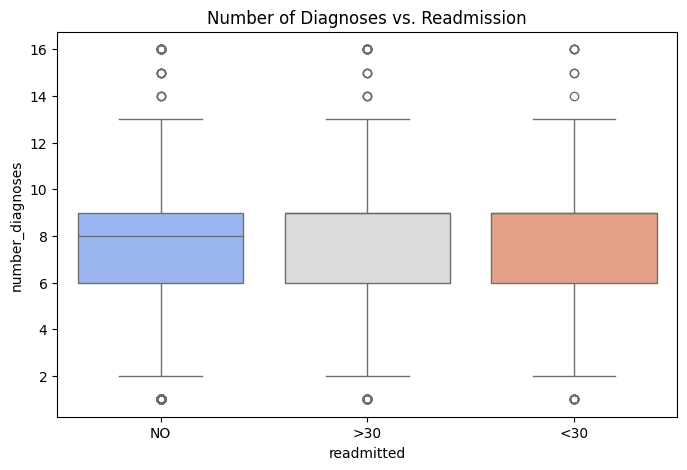

<ipython-input-18-22c119d4f002>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted'], y=df['time_in_hospital'], palette="coolwarm")


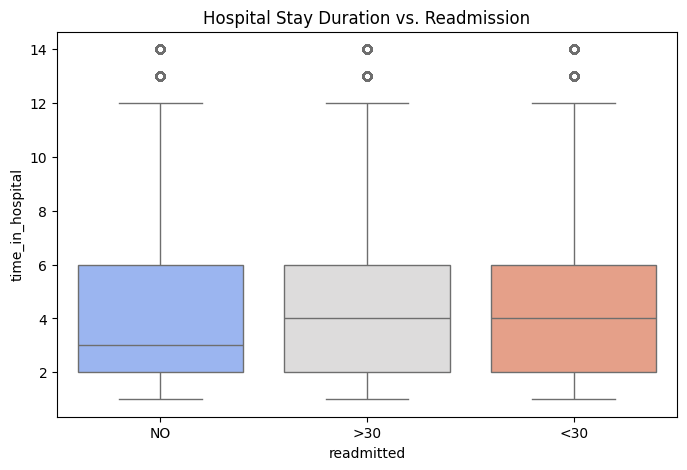

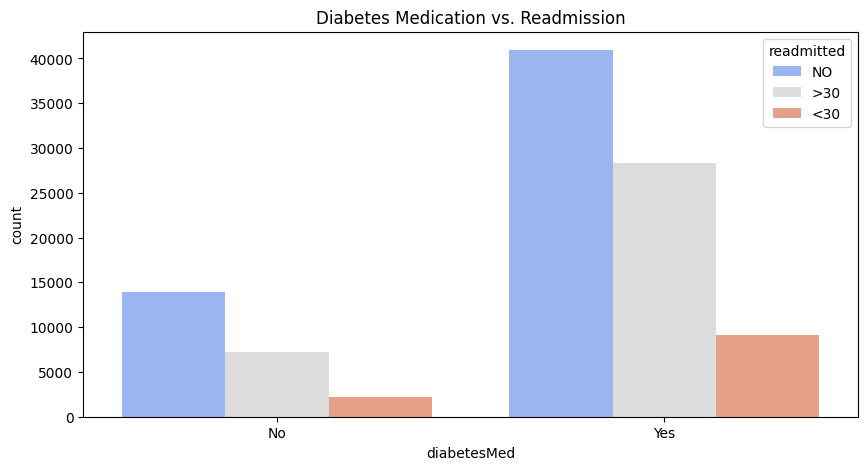

In [ ]:
# Clinical & Treatment-Related Factors#
#Number of Comorbidities & Readmission

plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted'], y=df['number_diagnoses'], palette="coolwarm")
plt.title("Number of Diagnoses vs. Readmission")
plt.show()
#Prior Hospitalization & Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted'], y=df['time_in_hospital'], palette="coolwarm")
plt.title("Hospital Stay Duration vs. Readmission")
plt.show()
#Medication & Readmission
plt.figure(figsize=(10,5))
sns.countplot(x=df['diabetesMed'], hue=df['readmitted'], palette="coolwarm")
plt.title("Diabetes Medication vs. Readmission")
plt.show()


In [ ]:
# Check if all columns are numeric
print(X_train.dtypes)

# Check for NaN values
print(X_train.isnull().sum().sum())  # Should be 0

# Check target variable distribution
print(y_train.value_counts())
X_train = X_train.fillna(0)  # Replace NaN with 0
X_test = X_test.fillna(0)

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


Unnamed: 0                    int64
encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                         float64
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                   

Categorical Columns: ['race', 'gender', 'weight', 'payer_code', 'medical_specialty', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone', 'change', 'diabetesMed']
Categorical columns encoded successfully!
Model trained successfully!

Top 10 Most Important Features:
                      Feature  Importance
45         readmitted_binary    0.240043
2                patient_nbr    0.082963
1               encounter_id    0.072390
0                 Unnamed: 0    0.071733
13        num_lab_procedures    0.060339
15           num_medications    0.053908
10          time_in_hospital    0.039405
18          number_inpatient    0.034929
5                        age    

<ipython-input-32-93bfe66ee95d>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'][:10], y=feature_importances['Feature'][:10], palette="viridis")


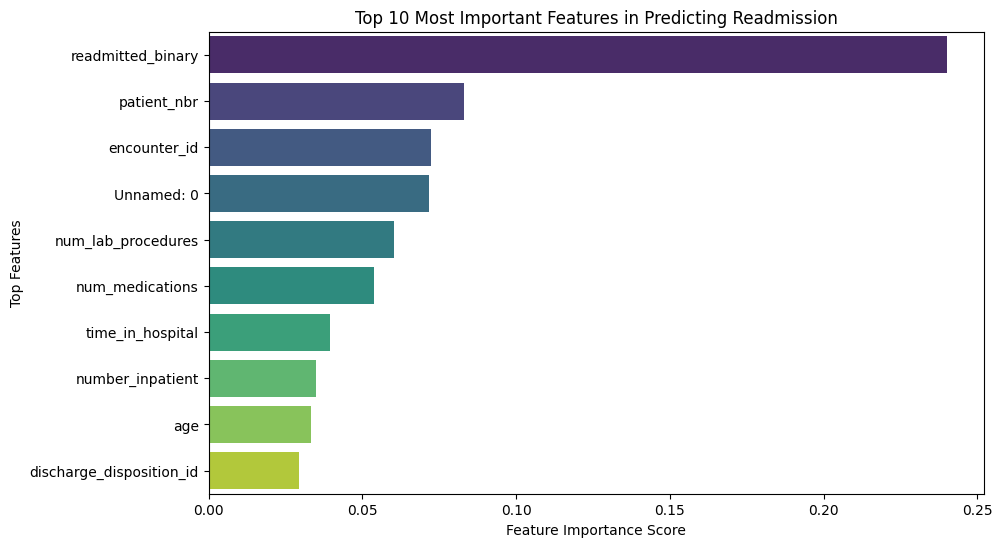

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features and target
X = df.drop(columns=['readmitted'])  # Remove target column
y = df['readmitted']  # Target: Readmission

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

# Convert categorical columns to category type
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

    # Align test categories with training data
    X_test[col] = X_test[col].cat.set_categories(X_train[col].cat.categories)

    # Convert to integer codes
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes

print("Categorical columns encoded successfully!")

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Model trained successfully!")

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Most Important Features:\n", feature_importances.head(10))

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances['Importance'][:10], y=feature_importances['Feature'][:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Top Features")
plt.title("Top 10 Most Important Features in Predicting Readmission")
plt.show()


<ipython-input-33-fc2caa1f73af>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['readmitted_binary'], palette="coolwarm")


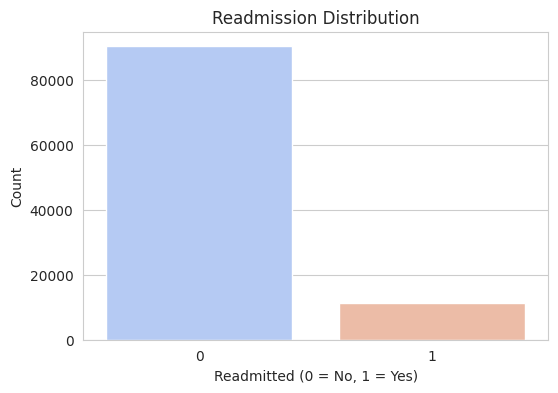

<ipython-input-33-fc2caa1f73af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['age'], palette="coolwarm")


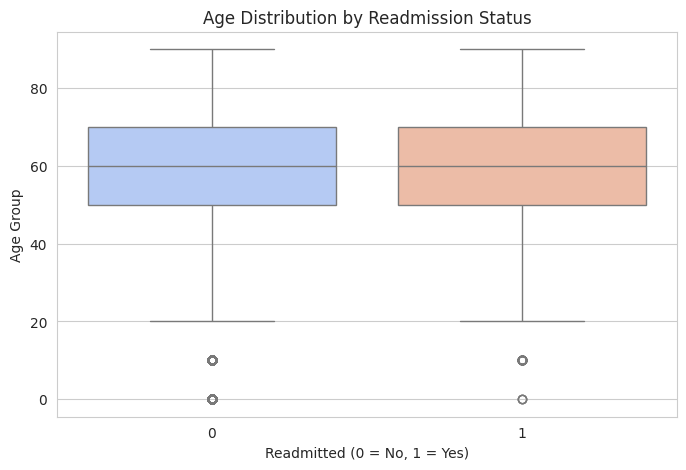

<ipython-input-33-fc2caa1f73af>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['num_lab_procedures'], palette="coolwarm")


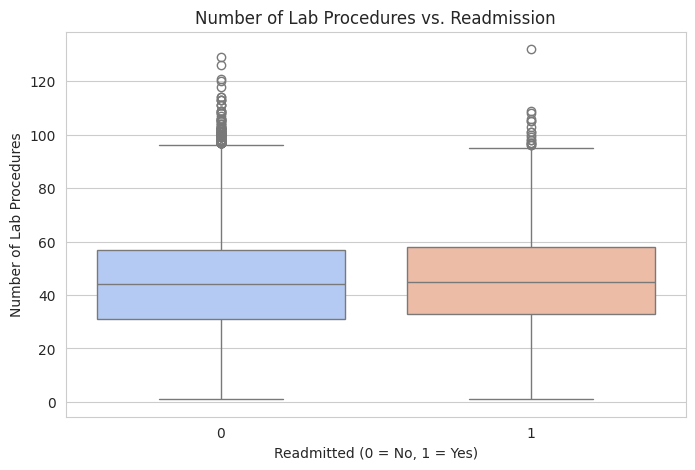

<ipython-input-33-fc2caa1f73af>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['num_medications'], palette="coolwarm")


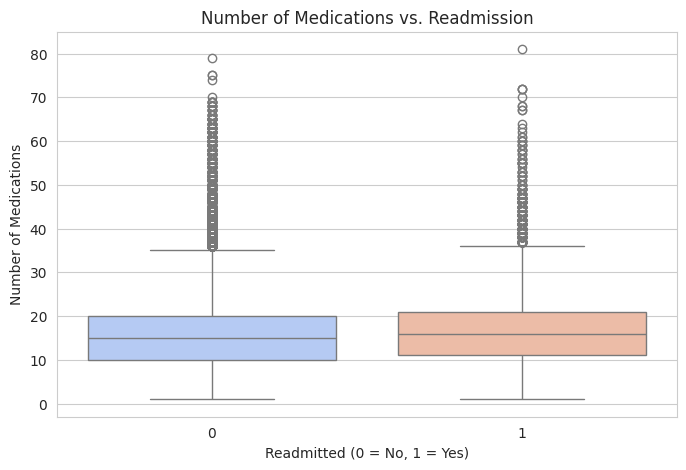

<ipython-input-33-fc2caa1f73af>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['time_in_hospital'], palette="coolwarm")


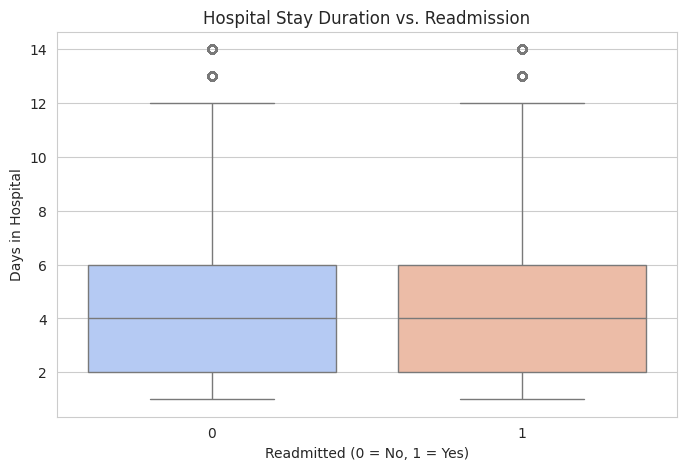

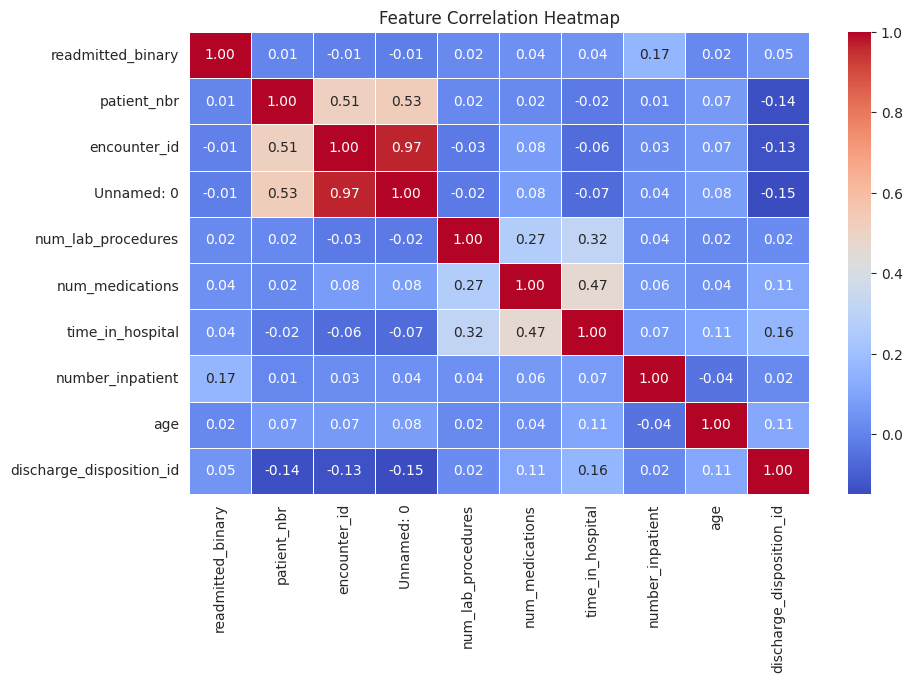

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset (if not already loaded)
# df = pd.read_csv("processed_diabetes_data.csv")

# Define top features from feature importance
top_features = [
    'readmitted_binary', 'patient_nbr', 'encounter_id', 'Unnamed: 0',
    'num_lab_procedures', 'num_medications', 'time_in_hospital',
    'number_inpatient', 'age', 'discharge_disposition_id'
]

# Filter dataset for relevant columns
df_top = df[top_features]

# Set figure style
sns.set_style("whitegrid")

# 1️⃣ Distribution of Readmission (Target Variable)
plt.figure(figsize=(6,4))
sns.countplot(x=df['readmitted_binary'], palette="coolwarm")
plt.title("Readmission Distribution")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Age Distribution by Readmission Status
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['age'], palette="coolwarm")
plt.title("Age Distribution by Readmission Status")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Age Group")
plt.show()

# 3️⃣ Number of Lab Procedures vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['num_lab_procedures'], palette="coolwarm")
plt.title("Number of Lab Procedures vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Lab Procedures")
plt.show()

# 4️⃣ Number of Medications vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['num_medications'], palette="coolwarm")
plt.title("Number of Medications vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Medications")
plt.show()

# 5️⃣ Time in Hospital vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['time_in_hospital'], palette="coolwarm")
plt.title("Hospital Stay Duration vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Days in Hospital")
plt.show()

# 6️⃣ Heatmap of Feature Correlations
plt.figure(figsize=(10,6))
sns.heatmap(df_top.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-41-4844eb4f357a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['number_diagnoses'], palette="coolwarm")


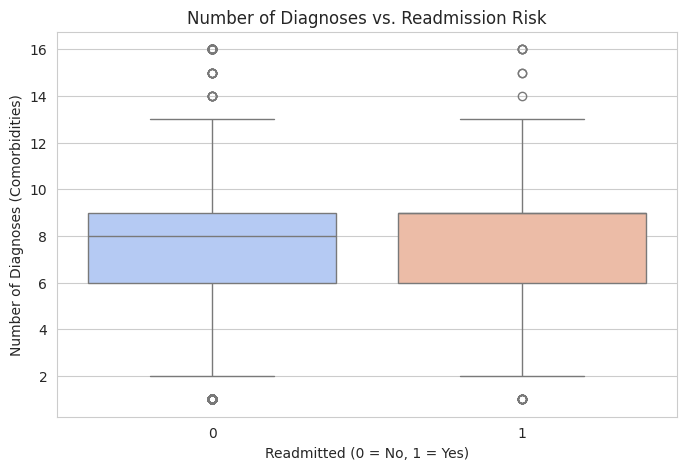

<ipython-input-41-4844eb4f357a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['number_inpatient'], palette="coolwarm")


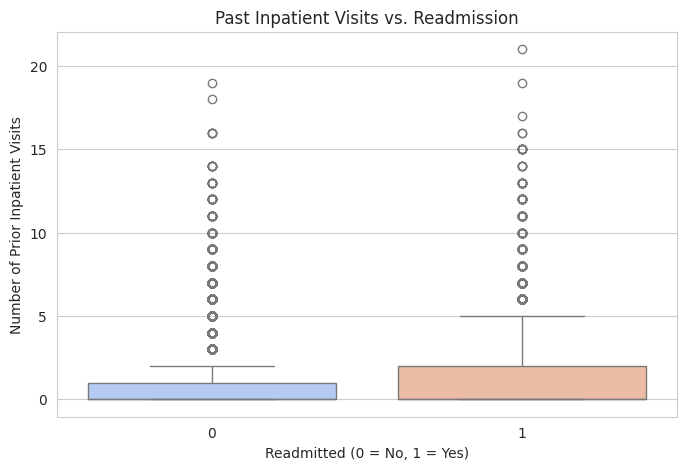

<ipython-input-41-4844eb4f357a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['number_outpatient'], palette="coolwarm")


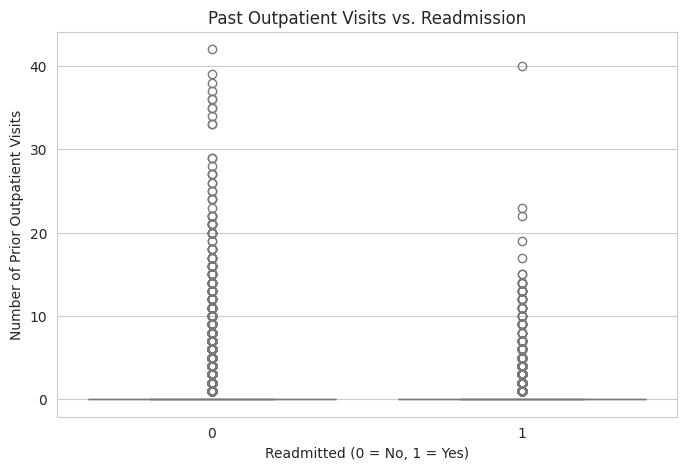

<ipython-input-41-4844eb4f357a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['number_emergency'], palette="coolwarm")


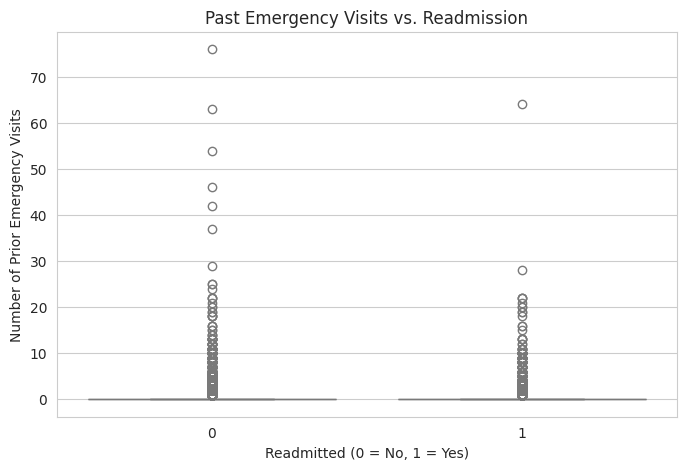

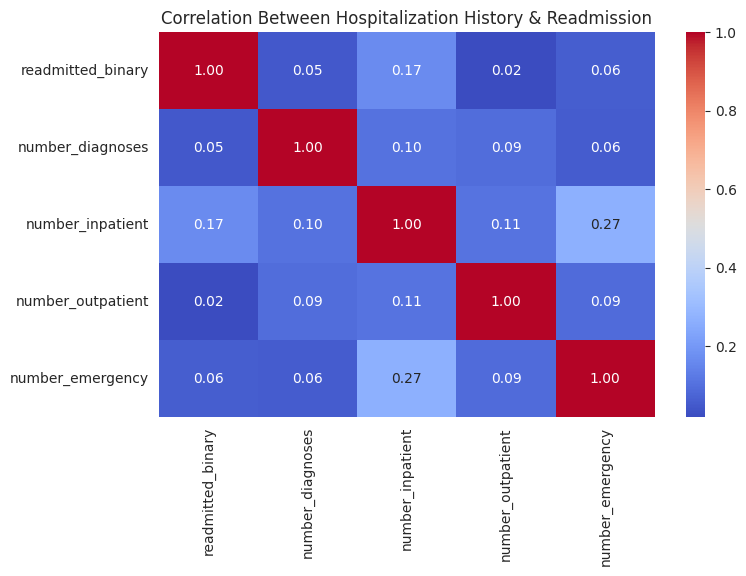

Feature: number_diagnoses | T-Test p-value: 0.00000
🔹 number_diagnoses significantly impacts readmission risk (p < 0.05)

Feature: number_inpatient | T-Test p-value: 0.00000
🔹 number_inpatient significantly impacts readmission risk (p < 0.05)

Feature: number_outpatient | T-Test p-value: 0.00000
🔹 number_outpatient significantly impacts readmission risk (p < 0.05)

Feature: number_emergency | T-Test p-value: 0.00000
🔹 number_emergency significantly impacts readmission risk (p < 0.05)



<ipython-input-41-4844eb4f357a>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['readmitted_binary'], y=df['time_in_hospital'], palette="coolwarm")


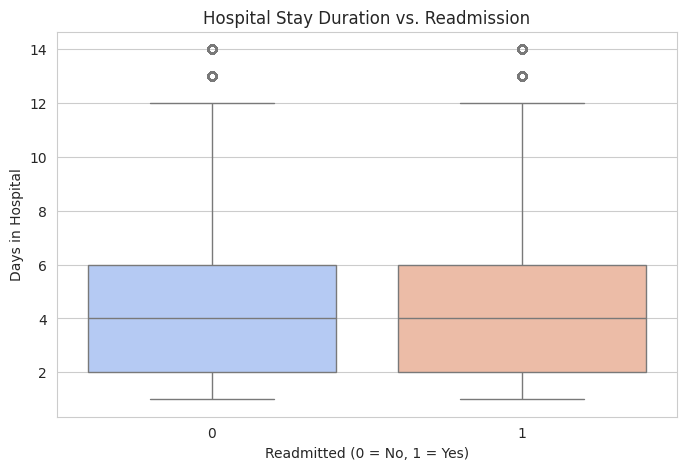

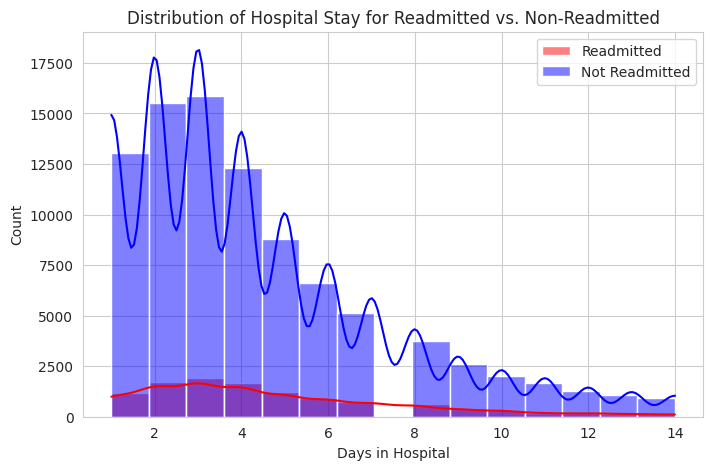

Pearson Correlation: 0.0442, p-value: 0.00000
T-Test p-value: 0.00000
🔹 Hospital stay length significantly impacts readmission likelihood (p < 0.05)


In [ ]:
#How do comorbidities and prior hospitalization history influence readmission risk?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset if not already loaded
# df = pd.read_csv("processed_diabetes_data.csv")

# Define key features
comorbidity_features = ['number_diagnoses']
hospitalization_history = ['number_inpatient', 'number_outpatient', 'number_emergency']

# Set visualization style
sns.set_style("whitegrid")

# 1️⃣ Distribution of Comorbidities vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['number_diagnoses'], palette="coolwarm")
plt.title("Number of Diagnoses vs. Readmission Risk")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Diagnoses (Comorbidities)")
plt.show()

# 2️⃣ Prior Inpatient Visits vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['number_inpatient'], palette="coolwarm")
plt.title("Past Inpatient Visits vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Prior Inpatient Visits")
plt.show()

# 3️⃣ Prior Outpatient Visits vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['number_outpatient'], palette="coolwarm")
plt.title("Past Outpatient Visits vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Prior Outpatient Visits")
plt.show()

# 4️⃣ Prior Emergency Visits vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['number_emergency'], palette="coolwarm")
plt.title("Past Emergency Visits vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Number of Prior Emergency Visits")
plt.show()

# 5️⃣ Correlation Between Hospitalization History & Readmission
plt.figure(figsize=(8,5))
sns.heatmap(df[['readmitted_binary', 'number_diagnoses', 'number_inpatient', 'number_outpatient', 'number_emergency']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Hospitalization History & Readmission")
plt.show()

# 6️⃣ Statistical Analysis: T-Test for Readmitted vs. Non-Readmitted Groups
for feature in comorbidity_features + hospitalization_history:
    readmitted = df[df['readmitted_binary'] == 1][feature]
    not_readmitted = df[df['readmitted_binary'] == 0][feature]
    stat, p_value = ttest_ind(readmitted, not_readmitted, equal_var=False)
    print(f"Feature: {feature} | T-Test p-value: {p_value:.5f}")

    if p_value < 0.05:
        print(f"🔹 {feature} significantly impacts readmission risk (p < 0.05)\n")
    else:
        print(f"⚠ {feature} does not significantly impact readmission risk (p > 0.05)\n")

#Does the length of the initial hospital stay correlate with readmission likelihood?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

# Load dataset if not already loaded
# df = pd.read_csv("processed_diabetes_data.csv")

# Set visualization style
sns.set_style("whitegrid")

# 1️⃣ Boxplot: Length of Stay vs. Readmission
plt.figure(figsize=(8,5))
sns.boxplot(x=df['readmitted_binary'], y=df['time_in_hospital'], palette="coolwarm")
plt.title("Hospital Stay Duration vs. Readmission")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Days in Hospital")
plt.show()

# 2️⃣ Histogram: Distribution of Hospital Stay for Readmitted vs. Non-Readmitted
plt.figure(figsize=(8,5))
sns.histplot(df[df['readmitted_binary'] == 1]['time_in_hospital'], color="red", bins=15, label="Readmitted", kde=True)
sns.histplot(df[df['readmitted_binary'] == 0]['time_in_hospital'], color="blue", bins=15, label="Not Readmitted", kde=True)
plt.title("Distribution of Hospital Stay for Readmitted vs. Non-Readmitted")
plt.xlabel("Days in Hospital")
plt.ylabel("Count")
plt.legend()
plt.show()

# 3️⃣ Correlation Analysis
corr, p_value_corr = pearsonr(df['time_in_hospital'], df['readmitted_binary'])
print(f"Pearson Correlation: {corr:.4f}, p-value: {p_value_corr:.5f}")

# 4️⃣ Statistical Test: T-Test
readmitted_stay = df[df['readmitted_binary'] == 1]['time_in_hospital']
not_readmitted_stay = df[df['readmitted_binary'] == 0]['time_in_hospital']
stat, p_value_ttest = ttest_ind(readmitted_stay, not_readmitted_stay, equal_var=False)

print(f"T-Test p-value: {p_value_ttest:.5f}")

if p_value_ttest < 0.05:
    print("🔹 Hospital stay length significantly impacts readmission likelihood (p < 0.05)")
else:
    print("⚠ Hospital stay length does NOT significantly impact readmission likelihood (p > 0.05)")


In [ ]:
#Can we identify distinct patient clusters based on clinical and demographic features that correlate with different risk profiles and outcomes?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select important features for clustering
features_for_clustering = [
    'age', 'num_lab_procedures', 'num_medications',
    'time_in_hospital', 'number_inpatient'
]

# Extract relevant data
df_cluster = df[features_for_clustering]

# Standardize features (K-Means is sensitive to scale)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

# Determine the optimal number of clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method to find optimal K
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Apply K-Means with optimal K (let’s assume K=3 based on Elbow Method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = df_scaled['Cluster']

# Visualize Clusters: Age vs. Time in Hospital
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['time_in_hospital'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Age")
plt.ylabel("Time in Hospital")
plt.title("Patient Clusters Based on Age & Hospital Stay")
plt.show()

# Boxplot to Compare Readmission Rates Across Clusters
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Cluster'], y=df['num_medications'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Number of Medications")
plt.title("Cluster Analysis: Medications per Cluster")
plt.show()

# Print Cluster Characteristics
print(df.groupby('Cluster')[features_for_clustering].mean())


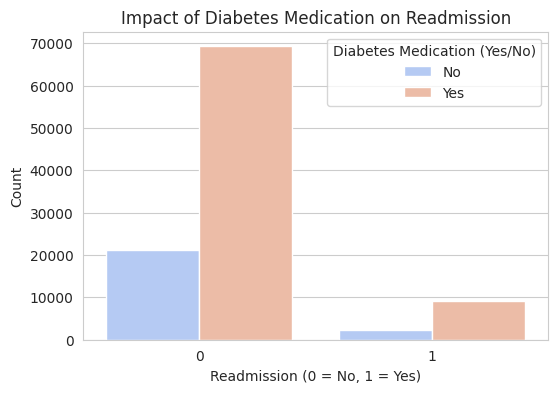

Chi-Square Test Statistic: 74.66943202412664
P-Value: 5.5651160886737224e-18
✅ Diabetes medication significantly affects readmission.


In [ ]:
#Does the prescription of diabetic medication influence a patient's readmission?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Check readmission rates based on diabetic medication
plt.figure(figsize=(6,4))
sns.countplot(x=df['readmitted_binary'], hue=df['diabetesMed'], palette="coolwarm")
plt.title("Impact of Diabetes Medication on Readmission")
plt.xlabel("Readmission (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Diabetes Medication (Yes/No)")
plt.show()

# Perform Chi-Square test to check statistical significance
contingency_table = pd.crosstab(df['diabetesMed'], df['readmitted_binary'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("✅ Diabetes medication significantly affects readmission.")
else:
    print("❌ No significant impact of diabetes medication on readmission.")


<ipython-input-39-135c515bede7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Drug', y='time_in_hospital', data=drug_hospital_stay, palette="coolwarm")


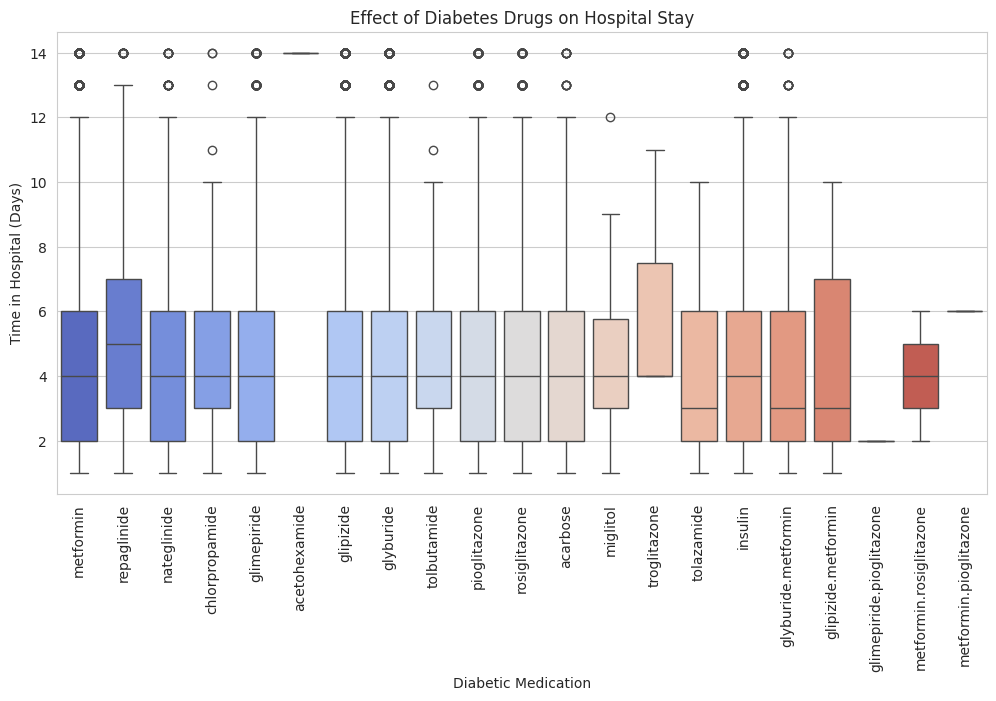


Average Hospital Stay for Each Diabetes Drug:
Drug
glimepiride.pioglitazone     2.000000
tolazamide                   3.923077
metformin.rosiglitazone      4.000000
glipizide.metformin          4.230769
glyburide.metformin          4.318697
metformin                    4.356664
pioglitazone                 4.454558
rosiglitazone                4.462215
glipizide                    4.525067
nateglinide                  4.587482
glimepiride                  4.590252
chlorpropamide               4.616279
glyburide                    4.617559
miglitol                     4.657895
insulin                      4.671956
acarbose                     4.724026
tolbutamide                  5.000000
repaglinide                  5.207927
metformin.pioglitazone       6.000000
troglitazone                 6.333333
acetohexamide               14.000000
Name: time_in_hospital, dtype: float64


In [ ]:
#Are there any drugs that reduce resource utilization and shorten hospital stay?
# List of diabetes medications in the dataset
diabetes_drugs = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
    'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide.metformin',
    'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone'
]

# Compute average hospital stay for each drug
drug_hospital_stay = df[diabetes_drugs + ['time_in_hospital']].melt(id_vars=['time_in_hospital'],
                                                                    var_name='Drug', value_name='Usage')

# Filter only patients where the drug was prescribed
drug_hospital_stay = drug_hospital_stay[drug_hospital_stay['Usage'] != 'No']

# Plot impact of different drugs on hospital stay
plt.figure(figsize=(12,6))
sns.boxplot(x='Drug', y='time_in_hospital', data=drug_hospital_stay, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Diabetic Medication")
plt.ylabel("Time in Hospital (Days)")
plt.title("Effect of Diabetes Drugs on Hospital Stay")
plt.show()

# Compute average hospital stay per drug
avg_stay_per_drug = drug_hospital_stay.groupby('Drug')['time_in_hospital'].mean().sort_values()
print("\nAverage Hospital Stay for Each Diabetes Drug:")
print(avg_stay_per_drug)
